In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")
%matplotlib inline

sns.set()

In [2]:
#using read_csv function to import the databases
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.0525
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.3940
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.6836
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.4775
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.0800


In [5]:
print(f' train shape: {train.shape}')
print(f' test shape: {test.shape}')

 train shape: (1460, 81)
 test shape: (1459, 81)


### Correlation

In [6]:
#Looking for the correlation between variables
corr = train.corr()

corr.SalePrice.sort_values(ascending= False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

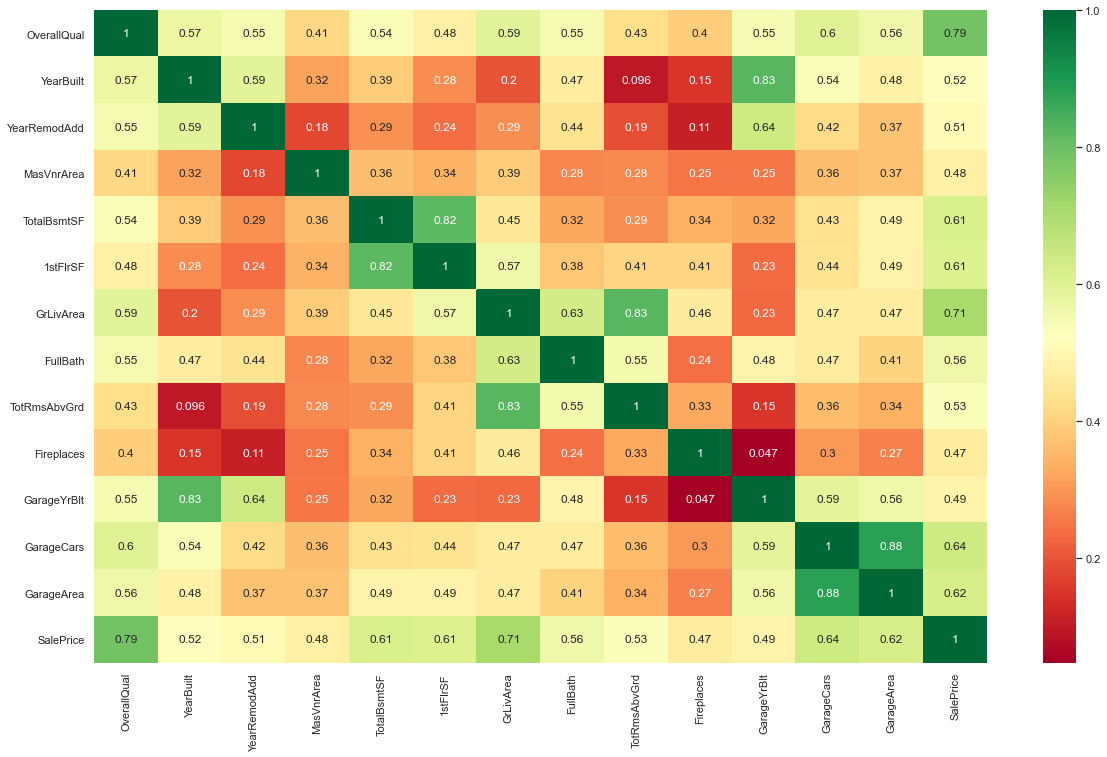

In [7]:
corr = train.corr()
variables = corr.index[abs(corr["SalePrice"]) > 0.46]
plt.figure(figsize = (20,12))
map = sns.heatmap(train[variables].corr(),annot=True,cmap="RdYlGn")

After looking to the correlation to the training dataset we can have a thought on what variables we must use. With this results first we will make an analysis with the numerical variables with a correlation higher than .46 

 ## Skewness - Data Distribution - Outliers-

For all the numerical variables that we have choosen it is necessary to see the distribution of the data in order to be able to check if there are columns with skew to the right or left or if they have a normal distribution, so it would be best to graph them through histograms. Also we need to see the interaction between  our target variable against the others so we will display a correlation heatmap to see the results that we need a choose the best variables to work with

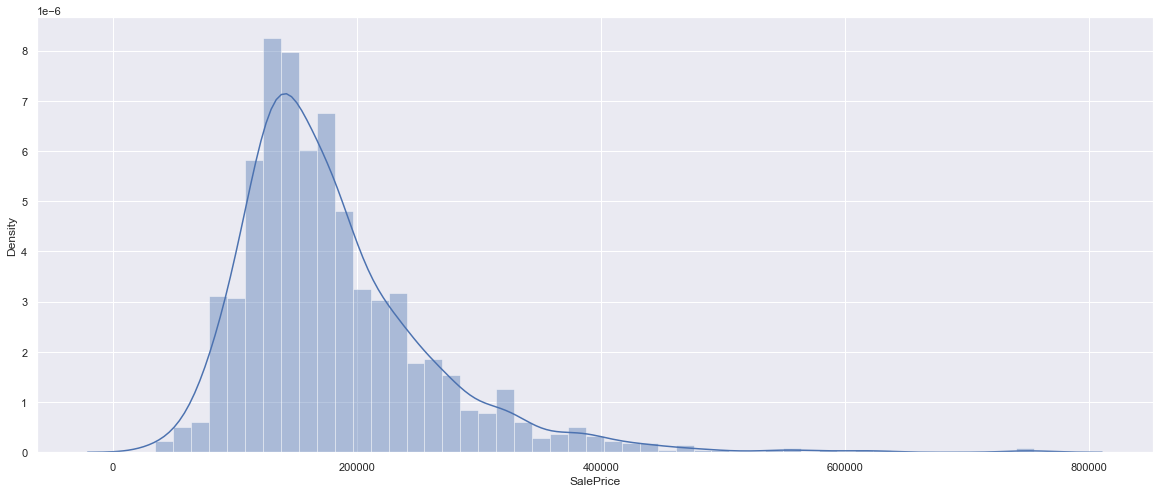

In [8]:
sns.set_theme()
plt.figure(figsize=(20,8))
sns.distplot(train['SalePrice'],kde=True);

In [9]:
train.SalePrice.skew()

1.8828757597682129


As we can see, it is skewed to the right which it means that there is a higher probability that there are extreme positive values to the right and we would have to use the median to describe the central tendency of the data. In order to chande this we will use natural logarithm to modify the skewness

In [10]:
train.SalePrice = np.log1p(train.SalePrice)
test.SalePrice = np.log1p(train.SalePrice)

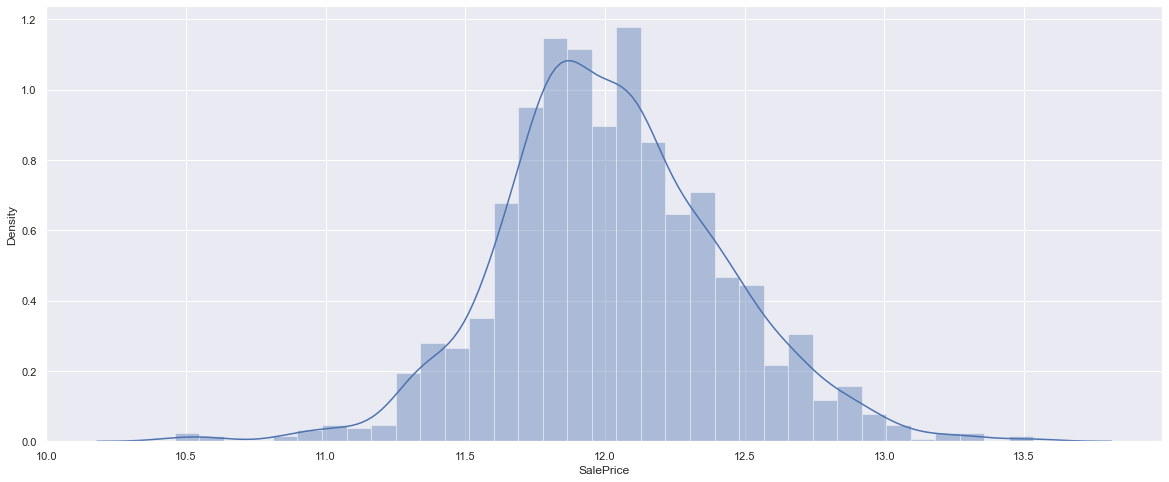

In [11]:
#Plot again the SalePrice variable to see the changes
plt.figure(figsize=(20,8))
sns.distplot(train.SalePrice, kde= True);

In [12]:
train.SalePrice.skew()

0.12134661989685333

As we can see the after applying natural logarithm to SalePrice, the distribution of the data it is almost perfect, changing the skewness from 1.88 to .12

In [13]:
#Apply the correlation function in order to see the changes
corr = train.corr()

corr.SalePrice.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr


As we can see, after having our target variable with a normal distribution, the correlation it has with the other variables improved drastically.


Now it is time to see how the behavior of more other variables is, the distribution of their data and the behavior they have with our dependent variable

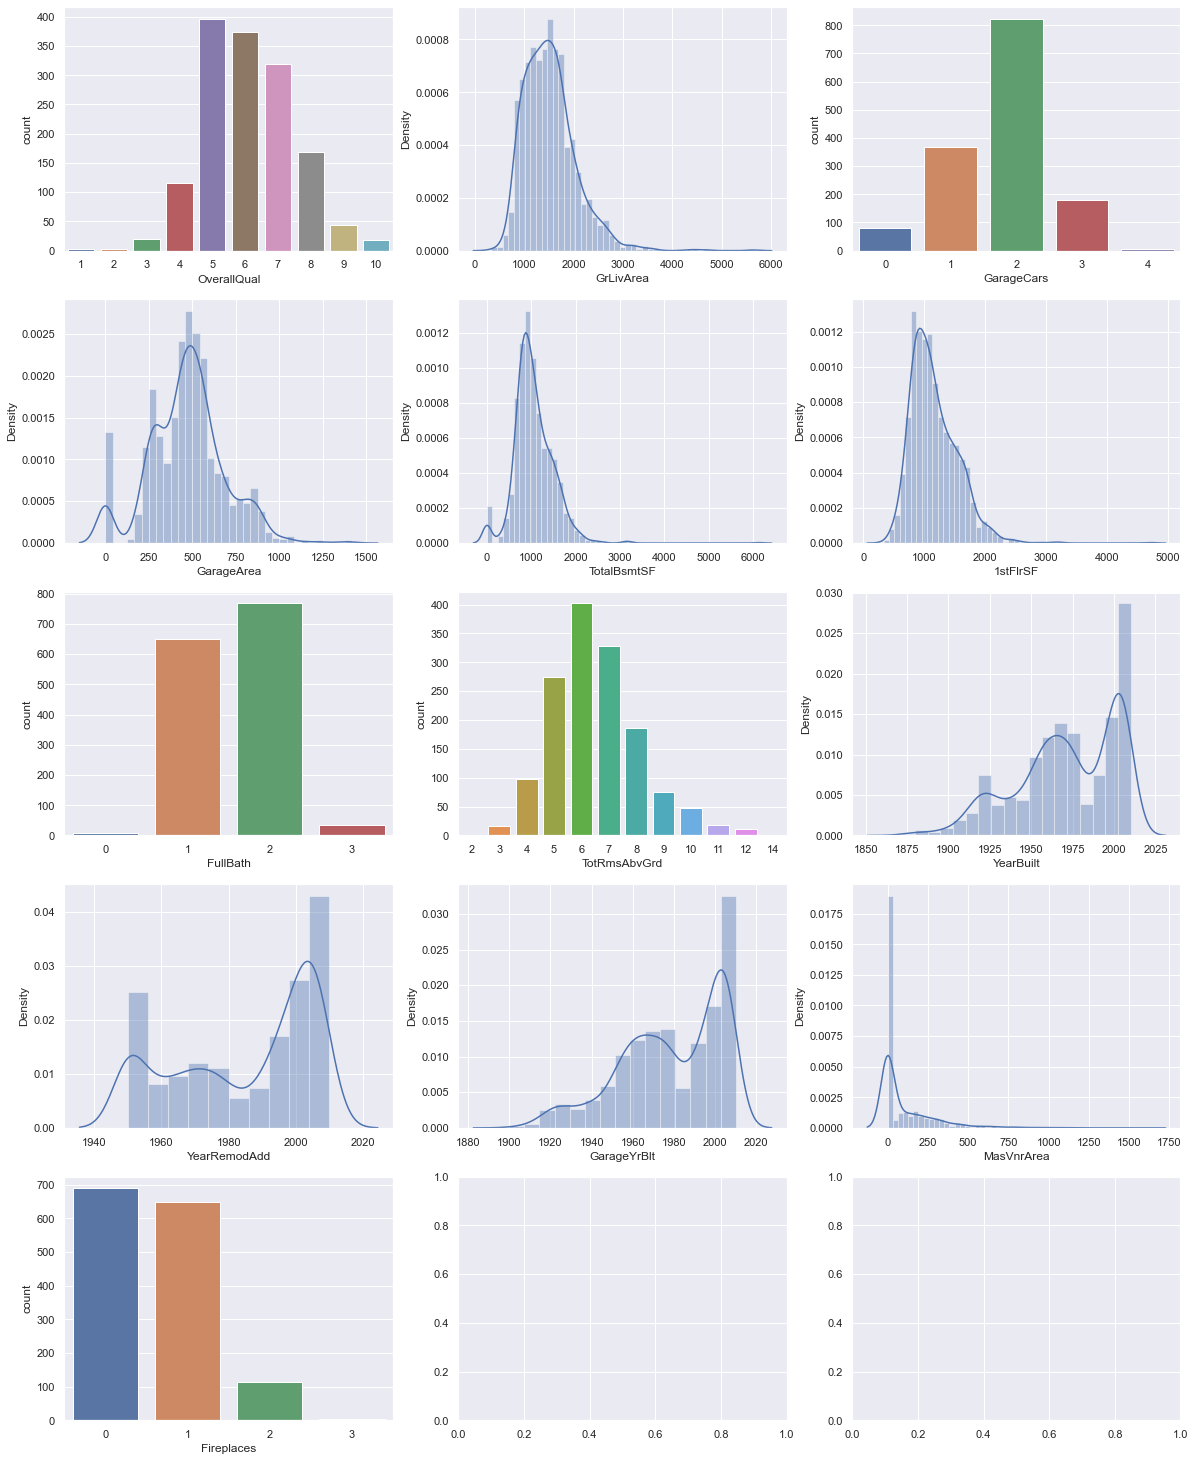

In [14]:
#plot the distribution of variables with most correlation
fig, axes = plt.subplots(5,3, figsize = (20,26))

sns.countplot(train['OverallQual'], ax = axes[0,0]);
sns.distplot(train['GrLivArea'], kde = True, ax = axes[0,1]);
sns.countplot(train['GarageCars'] , ax = axes[0,2]);
sns.distplot(train['GarageArea'], kde = True, ax = axes[1,0]);
sns.distplot(train['TotalBsmtSF'], kde = True, ax = axes[1,1]);
sns.distplot(train['1stFlrSF'], kde= True, ax = axes[1,2]);
sns.countplot(train['FullBath'], ax = axes[2,0]);
sns.countplot(train['TotRmsAbvGrd'], ax = axes[2,1]);
sns.distplot(train['YearBuilt'], kde = True, ax = axes[2,2]);
sns.distplot(train['YearRemodAdd'],kde = True, ax = axes[3,0]);
sns.distplot(train['GarageYrBlt'], kde = True , ax = axes[3,1]);
sns.distplot(train['MasVnrArea'], kde = True, ax = axes[3,2]);
sns.countplot(train['Fireplaces'], ax = axes[4,0]);


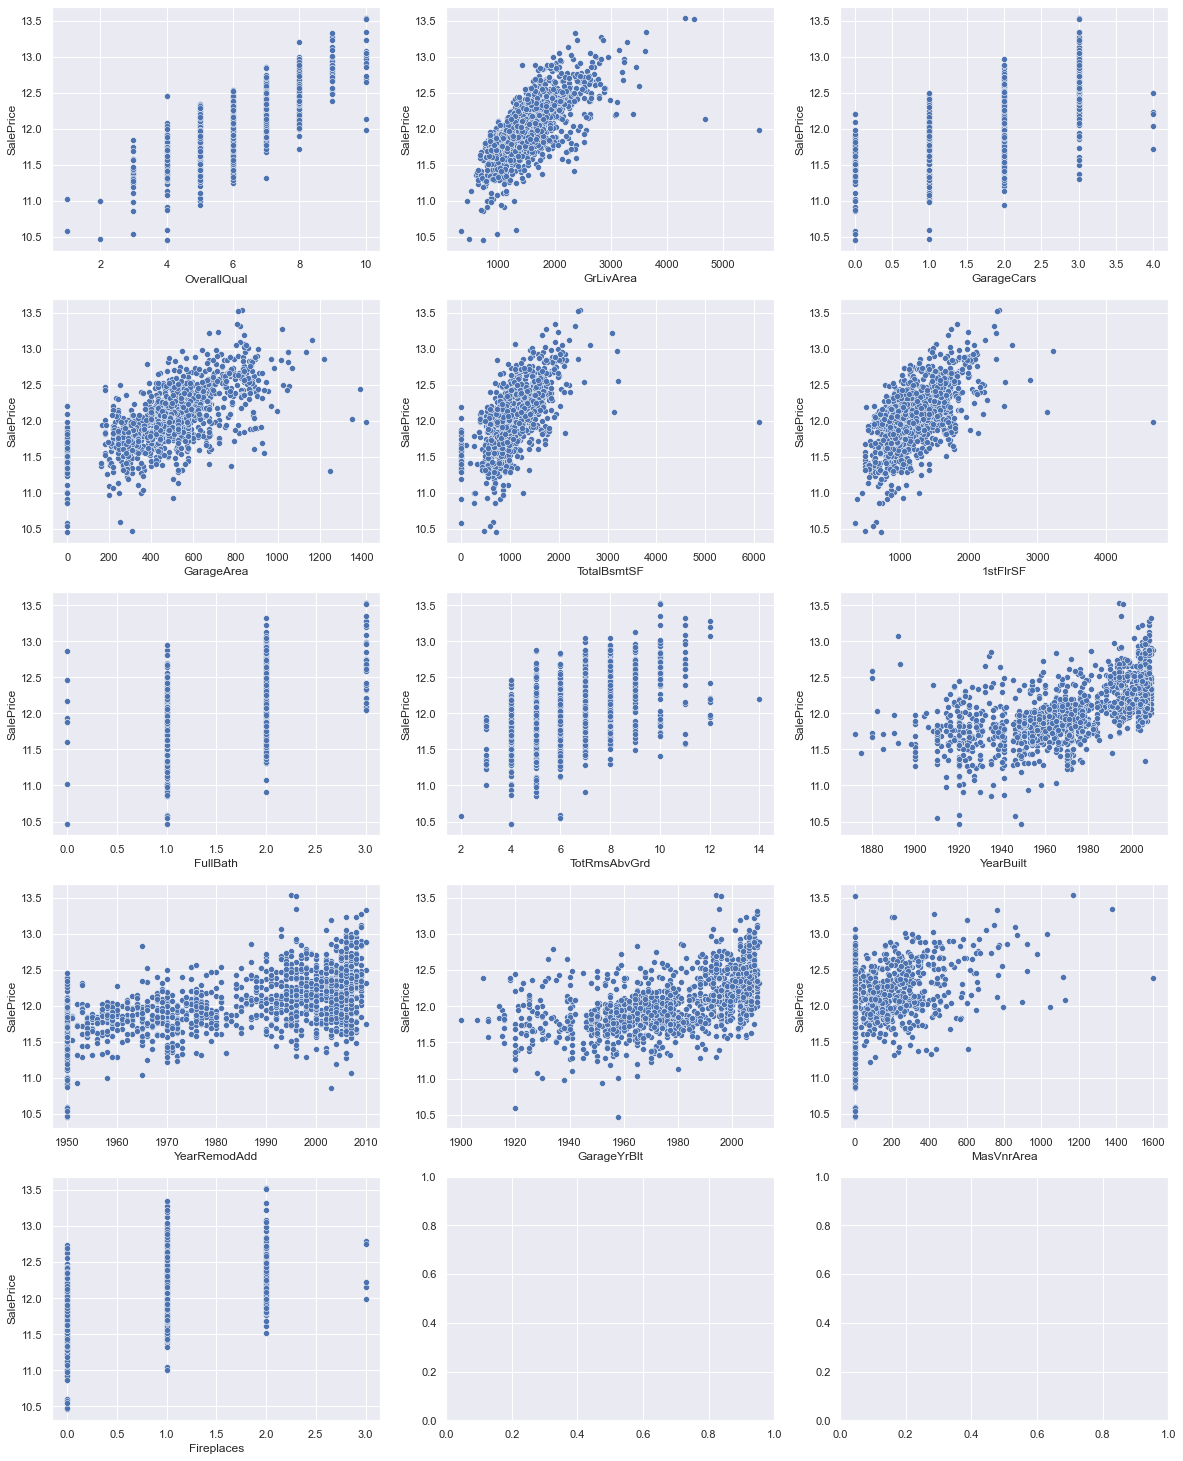

In [15]:
#now  plot de correlation between the independent variable against the targent variable
#plot the distribution of variables with most correlation
fig, axes = plt.subplots(5,3, figsize = (20,26))

sns.scatterplot(data = train,x ='OverallQual',y ='SalePrice', ax = axes[0,0]);
sns.scatterplot(data = train,x ='GrLivArea' ,y ='SalePrice', ax = axes[0,1]);
sns.scatterplot(data = train,x = 'GarageCars' ,y ='SalePrice', ax = axes[0,2]);
sns.scatterplot(data = train,x ='GarageArea',y ='SalePrice', ax = axes[1,0]);
sns.scatterplot(data = train,x ='TotalBsmtSF',y ='SalePrice', ax = axes[1,1]);
sns.scatterplot(data = train,x ='1stFlrSF',y ='SalePrice', ax = axes[1,2]);
sns.scatterplot(data = train,x ='FullBath',y ='SalePrice', ax = axes[2,0]);
sns.scatterplot(data = train,x ='TotRmsAbvGrd',y ='SalePrice', ax = axes[2,1]);
sns.scatterplot(data = train,x ='YearBuilt',y ='SalePrice', ax = axes[2,2]);
sns.scatterplot(data = train,x = 'YearRemodAdd',y ='SalePrice', ax = axes[3,0]);
sns.scatterplot(data = train,x = 'GarageYrBlt',y ='SalePrice', ax = axes[3,1]);
sns.scatterplot(data = train,x ='MasVnrArea',y ='SalePrice', ax = axes[3,2]);
sns.scatterplot(data = train,x = 'Fireplaces',y ='SalePrice', ax = axes[4,0]);



Since we have seen the behavior of our variables, now it is time to start making the necessary modifications so that our database can be modeled and for this we have to concatenate the testing and training databases, later we will divide them again only It is to make the cleaning process faster.

In [16]:
df = pd.concat([train, test], ignore_index = True)

In [17]:
df.shape

(2919, 81)

In [18]:
# Use of iloc function to divide the dataframe
df1 = df.iloc[:, 0:20]
df2 = df.iloc[:, 21:41]
df3 = df.iloc[:,42:62]
df4 = df.iloc[:,63:]

After dividing the database we had to analyze what type of data we have to work with, if they are interger, floating point, boolean or string. We also need to know if there are missing values ​​among our variables

In [19]:
#We make use of the info function to have a  little bit of knowledge about our dataframes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotFrontage   2433 non-null   float64
 4   LotArea       2919 non-null   int64  
 5   Street        2919 non-null   object 
 6   Alley         198 non-null    object 
 7   LotShape      2919 non-null   object 
 8   LandContour   2919 non-null   object 
 9   Utilities     2917 non-null   object 
 10  LotConfig     2919 non-null   object 
 11  LandSlope     2919 non-null   object 
 12  Neighborhood  2919 non-null   object 
 13  Condition1    2919 non-null   object 
 14  Condition2    2919 non-null   object 
 15  BldgType      2919 non-null   object 
 16  HouseStyle    2919 non-null   object 
 17  OverallQual   2919 non-null   int64  
 18  OverallCond   2919 non-null 

In [20]:
#counting  nullvalues
print('df1 null values count')
print(f'LotFrontage : {df1.LotFrontage.isnull().sum()}')
print(f'Alley: {df1.Alley.isnull().sum()}')



df1 null values count
LotFrontage : 486
Alley: 2721


In [21]:
#showing the count of unique values of the Alley's variable
df1.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In our first dataframe it shows us 3 data types, (int64,object,float64), which tells us a bit about what we will be working with for our model. And specifically, there are two variables that stand out for the number of missing values they have, LotFrontage with 486 out of 2919 and Alley with 2721 out of 2919. The Alley variable tell us te type  of alley access, it can be  Gravel or  Paved, the problem is that it doesn't have enough information to be considered into our study, so it must be drop from the dataframe, this is the description of Alley's variable

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		

In [22]:
df1['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [23]:
df1['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

Something that we notice at the moment of reviewing the values of our variables is that two of them ('Street' and 'Utilities') almost have the same values for all of the column so it will not be significant having the same result in one variable, so it would be better to avoid them.

In [24]:
#Using the info function in our second dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RoofStyle     2919 non-null   object 
 1   RoofMatl      2919 non-null   object 
 2   Exterior1st   2918 non-null   object 
 3   Exterior2nd   2918 non-null   object 
 4   MasVnrType    2895 non-null   object 
 5   MasVnrArea    2896 non-null   float64
 6   ExterQual     2919 non-null   object 
 7   ExterCond     2919 non-null   object 
 8   Foundation    2919 non-null   object 
 9   BsmtQual      2838 non-null   object 
 10  BsmtCond      2837 non-null   object 
 11  BsmtExposure  2837 non-null   object 
 12  BsmtFinType1  2840 non-null   object 
 13  BsmtFinSF1    2918 non-null   float64
 14  BsmtFinType2  2839 non-null   object 
 15  BsmtFinSF2    2918 non-null   float64
 16  BsmtUnfSF     2918 non-null   float64
 17  TotalBsmtSF   2918 non-null   float64
 18  Heating       2919 non-null 

In [25]:
print('df2 null values count')
print(f'MasVnrType : {df2.MasVnrType.isnull().sum()}')
print(f'MasVnrArea: {df2.MasVnrArea.isnull().sum()}')
print(f'BsmtQual: {df2.BsmtQual.isnull().sum()}')
print(f'BsmtCond: {df2.BsmtCond.isnull().sum()}')
print(f'BsmtExposure: {df2.BsmtExposure.isnull().sum()}')
print(f'BsmtFinType1: {df2.BsmtFinType1.isnull().sum()}')
print(f'BsmtFinType2: {df2.BsmtFinType2.isnull().sum()}')


df2 null values count
MasVnrType : 24
MasVnrArea: 23
BsmtQual: 81
BsmtCond: 82
BsmtExposure: 82
BsmtFinType1: 79
BsmtFinType2: 80



In the second dataframe there are several columns with missing values, the only difference with our previous dataframe is that in each column the amount of missing data is relatively small. The number of missing values ​​that are found is in a range of 24 and 80, so it would not make sense to remove any of these columns.

In [26]:
#Using the info function in our third dataframe
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Electrical    2918 non-null   object 
 1   1stFlrSF      2919 non-null   int64  
 2   2ndFlrSF      2919 non-null   int64  
 3   LowQualFinSF  2919 non-null   int64  
 4   GrLivArea     2919 non-null   int64  
 5   BsmtFullBath  2917 non-null   float64
 6   BsmtHalfBath  2917 non-null   float64
 7   FullBath      2919 non-null   int64  
 8   HalfBath      2919 non-null   int64  
 9   BedroomAbvGr  2919 non-null   int64  
 10  KitchenAbvGr  2919 non-null   int64  
 11  KitchenQual   2918 non-null   object 
 12  TotRmsAbvGrd  2919 non-null   int64  
 13  Functional    2917 non-null   object 
 14  Fireplaces    2919 non-null   int64  
 15  FireplaceQu   1499 non-null   object 
 16  GarageType    2762 non-null   object 
 17  GarageYrBlt   2760 non-null   float64
 18  GarageFinish  2760 non-null 

In [27]:
print('df3 null values count')
print(f'Electrical: {df3.Electrical.isnull().sum()}')
print(f'FireplaceQu: {df3.FireplaceQu.isnull().sum()}')
print(f'GarageType: {df3.GarageType.isnull().sum()}')
print(f'GarageYrBlt: {df3.GarageYrBlt.isnull().sum()}')
print(f'GarageFinish: {df3.GarageFinish.isnull().sum()}')
print(f'GarageCars: {df3.GarageCars.isnull().sum()}')

df3 null values count
Electrical: 1
FireplaceQu: 1420
GarageType: 157
GarageYrBlt: 159
GarageFinish: 159
GarageCars: 1


In [28]:
#showing the count of unique values of the FireplaceQu's variable
df3.FireplaceQu.value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64


In the third dataframe created we also have variables with missing values, of which only one column is the one that stands out: "FireplaceQu", this variable has a total of 1420 missing values ​​out of 2919. FireplaceQu is the fireplace quality, the values that it has are the next ones:

       Ex	Excellent - Exceptional Masonry Fireplace,
       Gd	Good - Masonry Fireplace in main level,
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement,
       Fa	Fair - Prefabricated Fireplace in basement,
       Po	Poor - Ben Franklin Stove,
       NA	No Fireplace.
       
There really is a significant amount of missing values, but there is the justification that there is no fireplace quality in the house, and in addition to this the amount of NA values ​​does not exceed more than the half of the total data, so the treatment that  will be  given to this variable and their missing values ​​will be to replace all NA values ​​with "NF"

		

In [29]:
#Using the info function in our fourth dataframe
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GarageQual     2760 non-null   object 
 1   GarageCond     2760 non-null   object 
 2   PavedDrive     2919 non-null   object 
 3   WoodDeckSF     2919 non-null   int64  
 4   OpenPorchSF    2919 non-null   int64  
 5   EnclosedPorch  2919 non-null   int64  
 6   3SsnPorch      2919 non-null   int64  
 7   ScreenPorch    2919 non-null   int64  
 8   PoolArea       2919 non-null   int64  
 9   PoolQC         10 non-null     object 
 10  Fence          571 non-null    object 
 11  MiscFeature    105 non-null    object 
 12  MiscVal        2919 non-null   int64  
 13  MoSold         2919 non-null   int64  
 14  YrSold         2919 non-null   int64  
 15  SaleType       2918 non-null   object 
 16  SaleCondition  2919 non-null   object 
 17  SalePrice      2919 non-null   float64
dtypes: float

In [30]:
print('df4 null values count')
print(f'GarageQual: {df4.GarageQual.isnull().sum()}')
print(f'GarageCond: {df4.GarageCond.isnull().sum()}')
print(f'PoolQC: {df4.PoolQC.isnull().sum()}')
print(f'Fence: {df4.Fence.isnull().sum()}')
print(f'MiscFeature: {df4.MiscFeature.isnull().sum()}')

df4 null values count
GarageQual: 159
GarageCond: 159
PoolQC: 2909
Fence: 2348
MiscFeature: 2814


In [31]:
df4.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [32]:
df4.PoolArea.value_counts()

0      2906
144       1
228       1
368       1
444       1
480       1
512       1
576       1
648       1
738       1
800       1
519       1
555       1
561       1
Name: PoolArea, dtype: int64

In [33]:
df4.Fence.value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [34]:
df4.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

For the last Dataframe that was created, there are also missing values ​​where the most notable are in three variables ('PoolQC','Fence','MiscFeature'), each one has a significant number of missing values.The values ​​of each variable are shown as follows

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       

When viewing and analyzing these variables, we only reach the conclusion of having to remove the 'PoolQC' and 'MiscFeature' columns from the dataframe, also because 'PoolArea' it is correlated to 'PoolQC' we would have to drop it to, since the amount of data they present is too low, in the case of the Fence variable, we prefer to modify the NA values ​​to NFe
       
       
       

 ### Drop unusable variables, treatment to missing values and creting a new database

After looking at the correlation between all the variables against SalePrice, we decided to drop all the numerical values with a low correlation and with no importance as with the said before

In [35]:
# Drop variables
df.drop(['Id','Alley','Street','Utilities',"PoolQC","PoolArea","MiscFeature",'MSSubClass','LotFrontage','LotShape','LandContour','LotConfig','LandSlope','Condition1','Condition2',
          'BldgType','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','BsmtExposure',
         'BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','Heating','Electrical','LowQualFinSF',
         'BsmtFullBath','BsmtHalfBath','GarageType','GarageFinish','LotArea','HalfBath','BedroomAbvGr',
         'GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','BsmtFinSF1',
          'MoSold','YrSold','SaleType','SaleCondition','KitchenAbvGr','OverallCond','MiscVal','2ndFlrSF','CentralAir', 'BsmtCond'], axis =1 , inplace = True)

In [36]:
#Missing values treatment
df['MasVnrType'] = df['MasVnrType'].fillna('NMvt')
df['BsmtQual'] = df['BsmtQual'].fillna('NBsmt')
df['FireplaceQu'] = df['FireplaceQu'].fillna('NFp')
df['Fence'] = df['Fence'].fillna('NFe')

In [37]:
#Renaming columns
df.rename(columns={'1stFlrSF': 'FirstFlrSF'},inplace=True)

1stFlrSF, 2ndFlrSF and 3SsnPorch columns are being replaced to avoid that column title starts with numeric digits.

## Numerical variables treatment

In [38]:
df1 = df.select_dtypes(['int64','float64'])

In [39]:
df1.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'FirstFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [40]:
#check for skewness on the rest of the variables
df1.skew()

OverallQual     0.197212
YearBuilt      -0.600114
YearRemodAdd   -0.451252
MasVnrArea      2.602589
TotalBsmtSF     1.162882
FirstFlrSF      1.470360
GrLivArea       1.270010
FullBath        0.167692
TotRmsAbvGrd    0.758757
Fireplaces      0.733872
GarageYrBlt    -0.382150
GarageCars     -0.218373
GarageArea      0.241301
SalePrice       0.009935
dtype: float64

In [41]:
#apply log1p function to that needs their skewness to be fixed

numerical  = ['MasVnrArea','FirstFlrSF','GrLivArea','TotRmsAbvGrd']

for i in numerical:
    df[i] = np.log1p(df[i])
    

In [42]:
df.skew()

OverallQual     0.197212
YearBuilt      -0.600114
YearRemodAdd   -0.451252
MasVnrArea      0.524279
TotalBsmtSF     1.162882
FirstFlrSF      0.064861
GrLivArea       0.013194
FullBath        0.167692
TotRmsAbvGrd    0.035125
Fireplaces      0.733872
GarageYrBlt    -0.382150
GarageCars     -0.218373
GarageArea      0.241301
SalePrice       0.009935
dtype: float64

## Categorical Data Treatment

For the treatment of categorical data, it is basically to put dummy variables that help us convert all the information we have to numeric and with this we can apply it to our model.

In [43]:
df2 = df.select_dtypes(['object'])

In [44]:
df2.columns

Index(['MSZoning', 'Neighborhood', 'HouseStyle', 'MasVnrType', 'ExterCond',
       'Foundation', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'Functional',
       'FireplaceQu', 'Fence'],
      dtype='object')

In [45]:
df['Fence'].value_counts()

NFe      2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [46]:
df.shape

(2919, 26)

In [47]:
# using the get_dummies function
df= pd.get_dummies(df,columns=['MSZoning','Neighborhood','HouseStyle','MasVnrType','Functional','Fence','Foundation'])

In [48]:
#creating my own values trough a dictionary
labels = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NFp':0,'NBsmt':0,}

In [49]:
#Depending on the categorical value give a special number 
df['ExterCond'] = df['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NFp':0,'NBsmt':0,})
df['BsmtQual'] = df['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NFp':0,'NBsmt':0,})
df['HeatingQC'] = df['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NFp':0,'NBsmt':0,})
df['KitchenQual'] = df['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NFp':0,'NBsmt':0,})
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NFp':0,'NBsmt':0,})

In [50]:
#Saving the new database in a csv file
df.to_csv('df_ETL.csv', index = False)